In [3]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('./data/clean_compras.csv')

print(data.columns)
print(data.dtypes)

data = data[['BENEFICIARIO', 'FACT-NUE-FO', 'CONTRATO', 'CONCEPTO', 'TIPO', 'FDO-#OP', 'FECHA', 'IMPORTE', 'SHEET']]

print(data['BENEFICIARIO'].value_counts())

data['IMPORTE'].hist()


Index(['NUM BEN', 'BENEFICIARIO', 'RFC', 'FACTURA', 'CONTRATO', 'CONCEPTO',
       'TIPO', '# OP', 'FECHA', 'IMPORTE', 'SHEET'],
      dtype='object')
NUM BEN           int64
BENEFICIARIO     object
RFC              object
FACTURA          object
CONTRATO         object
CONCEPTO         object
TIPO             object
# OP            float64
FECHA            object
IMPORTE         float64
SHEET            object
dtype: object


KeyError: "['FACT-NUE-FO', 'FDO-#OP'] not in index"

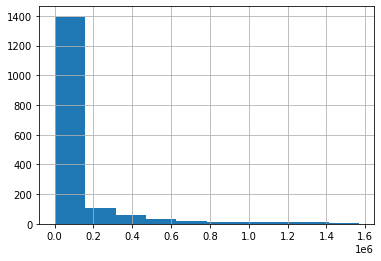

In [5]:
data[data['IMPORTE'] < data['IMPORTE'].quantile(0.95)]['IMPORTE'].hist()

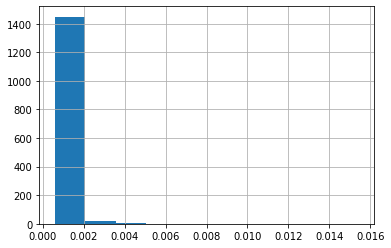

In [9]:
data['IMPORTE'].value_counts(normalize=True).hist()


In [10]:
sum_import = data.groupby('BENEFICIARIO').sum()['IMPORTE']
sum_import

BENEFICIARIO
ABC Y CONSTRUCCIONES, SA. DE CV.    2797339.46
ABUNDIS  ALBERTO                     188280.00
ACOSTA LUNA NORA SILVIA               42206.73
ADK CONSTRUCCIONES, SA. DE CV.       301416.34
AGUILAR LOPEZ ELIEZER                 40895.93
                                       ...    
VILLARREAL LEAL RODOLFO GILBERTO       1120.00
VILLARREAL PAEZ ANDRES MARCELO        10557.11
VILLEGAS CERDA MARIA DEL CARMEN       53076.65
ZAPATA CHAVIRA HOMERO ARTURO          76950.00
ZEA LUNA JOSE ANTONIO                172496.27
Name: IMPORTE, Length: 506, dtype: float64

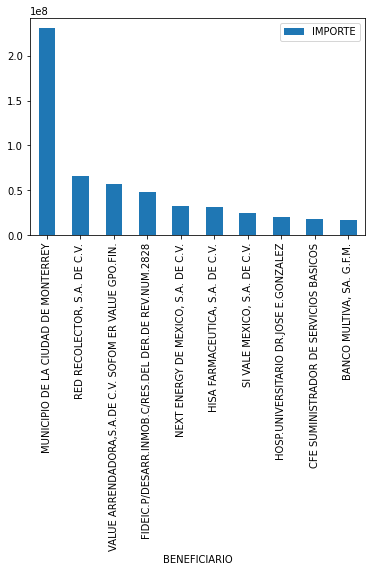

In [12]:
sum_import.reset_index().sort_values(by='IMPORTE', ascending=False).iloc[0:10].plot(kind='bar', x='BENEFICIARIO', y='IMPORTE')

In [16]:
mean_import = data.groupby('SHEET').mean()['IMPORTE']
mean_import.reset_index().sort_values(by='IMPORTE', ascending=False).iloc[0:10]

,SHEET,IMPORTE
2,GTOS VARIOS,841891.206837
3,OB.PUBLICA-GTS VARIOS (FDO ESP),355885.859915
0,COMUNIC,97668.258846
5,SERV PROF,85293.288000
4,SERV PERS,48157.958352
1,GTOS REPRESENT,9792.000000


In [18]:
sum_date_import = data.groupby('FECHA').sum()['IMPORTE']
sum_date_import

FECHA
2021-12-01    4.721979e+06
2021-12-02    2.177447e+07
2021-12-03    3.786167e+07
2021-12-06    1.129527e+07
2021-12-07    7.950843e+06
2021-12-08    1.685733e+06
2021-12-09    1.459032e+07
2021-12-10    4.403763e+07
2021-12-13    1.930204e+06
2021-12-14    2.362215e+07
2021-12-15    4.176868e+06
2021-12-16    3.536858e+07
2021-12-17    2.161519e+08
2021-12-20    8.415839e+07
2021-12-21    7.892753e+06
2021-12-22    7.273747e+05
2021-12-23    1.512671e+06
2021-12-24    2.262172e+07
2021-12-27    4.794464e+07
2021-12-28    4.920312e+07
2021-12-29    4.654603e+07
2021-12-30    6.750626e+07
2021-12-31    3.814605e+07
Name: IMPORTE, dtype: float64

In [20]:
various_buys = data[data['SHEET'] == 'GTOS VARIOS']


,BENEFICIARIO,FACT-NUE-FO,CONTRATO,CONCEPTO,TIPO,FDO-#OP,FECHA,IMPORTE,SHEET
0,"ALMACEN PAPELERO SALDAÑA, S.A. DE C.V.",MTY7059-158003-5907,ORDEN DE COMPRA 7356,SUMINISTRO DE MATERIAL DE PAPELERIA PARA LAS D...,TR,1021640.0,2021-12-30,8885.58,GTOS VARIOS
1,"PLOMIFERRETERA EL TORNILLO, S.A. DE C.V.",B24553-158003-5592,ORDEN DE COMPRA 7279,SUMINISTRO DE PILAS ALCALINAS AA Y AAA PARA LO...,TR,1021489.0,2021-12-10,17774.31,GTOS VARIOS
2,"PLOMIFERRETERA EL TORNILLO, S.A. DE C.V.",B24653-158003-5420,ORDEN DE COMPRA 7297,SUMINISTRO DE MATERIALES PARA LA DIR. DE IMAGE...,TR,1021489.0,2021-12-10,21385.84,GTOS VARIOS
3,"PLOMIFERRETERA EL TORNILLO, S.A. DE C.V.",B24711-158003-5881,ORDEN DE COMPRA 7373,SUMINISTRO DE MATERIAL REQUERIDO PARA LA REPAR...,TR,1021580.0,2021-12-17,23641.61,GTOS VARIOS
4,"PLOMIFERRETERA EL TORNILLO, S.A. DE C.V.",B24753-158003-5848,ORDEN DE COMPRA 7395,SUMINISTRO DE MATERIAL PARA LA FABRICACION DE ...,TR,1021580.0,2021-12-17,9014.36,GTOS VARIOS
...,...,...,...,...,...,...,...,...,...
564,"GS GAS Q, S.A. DE C.V.",BPLGK 78473091-158003-5928,SAD-627-2020,CONSUMO DE GASOLINA DE LA SEMANA DEL 08 AL 14...,TR,1021620.0,2021-12-24,337446.11,GTOS VARIOS
565,"GS GAS Q, S.A. DE C.V.",BPLGK 78473092-158003-5929,SAD-627-2020,CONSUMO DE DIESEL DE LA SEMANA DEL 08 AL 14 ...,TR,1021620.0,2021-12-24,109684.73,GTOS VARIOS
566,"GS GAS Q, S.A. DE C.V.",BPLGK 78472877-158003-5152,SAD-627-2020,CONSUMO DE GASOLINA DE LA SEMANA DEL 22 AL 26...,TR,1021628.0,2021-12-28,307980.22,GTOS VARIOS
567,"GS GAS Q, S.A. DE C.V.",BPLGK 78473126-158003-5954,SAD-627-2020,CONSUMO DE GASOLINA DE LA SEMANA DEL 15 AL 21...,TR,1021645.0,2021-12-31,224160.70,GTOS VARIOS


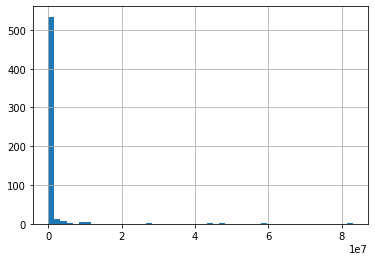

In [21]:
various_buys['IMPORTE'].hist(bins=50)

In [24]:
various_buys[various_buys['BENEFICIARIO'] == 'MUNICIPIO DE LA CIUDAD DE MONTERREY']['SHEET'].value_counts()

GTOS VARIOS    15
Name: SHEET, dtype: int64

In [30]:
buys_sheet = data.groupby(['BENEFICIARIO', 'SHEET']).sum()['IMPORTE'].sort_values().unstack('SHEET')
buys_sheet

SHEET,COMUNIC,GTOS REPRESENT,GTOS VARIOS,OB.PUBLICA-GTS VARIOS (FDO ESP),SERV PERS,SERV PROF
BENEFICIARIO,,,,,,
"ABC Y CONSTRUCCIONES, SA. DE CV.",NaN,NaN,NaN,2797339.46,NaN,NaN
ABUNDIS ALBERTO,NaN,NaN,NaN,NaN,NaN,188280.0
ACOSTA LUNA NORA SILVIA,NaN,NaN,NaN,NaN,42206.73,NaN
"ADK CONSTRUCCIONES, SA. DE CV.",NaN,NaN,NaN,301416.34,NaN,NaN
AGUILAR LOPEZ ELIEZER,NaN,NaN,NaN,NaN,40895.93,NaN
...,...,...,...,...,...,...
VILLARREAL LEAL RODOLFO GILBERTO,NaN,NaN,1120.00,NaN,NaN,NaN
VILLARREAL PAEZ ANDRES MARCELO,NaN,NaN,NaN,NaN,10557.11,NaN
VILLEGAS CERDA MARIA DEL CARMEN,NaN,NaN,53076.65,NaN,NaN,NaN


In [28]:
top_ben = data.groupby('BENEFICIARIO')['IMPORTE'].sum().sort_values(ascending=False).index[0:10]
top_ben

Index(['MUNICIPIO DE LA CIUDAD DE MONTERREY', 'RED RECOLECTOR, S.A. DE C.V.',
       'VALUE ARRENDADORA,S.A.DE C.V. SOFOM ER VALUE GPO.FIN.',
       'FIDEIC.P/DESARR.INMOB.C/RES.DEL DER.DE REV.NUM.2828',
       'NEXT ENERGY DE MEXICO, S.A. DE C.V.',
       'HISA FARMACEUTICA, S.A. DE C.V.', 'SI VALE MEXICO, S.A. DE C.V.',
       'HOSP.UNIVERSITARIO DR.JOSE E.GONZALEZ',
       'CFE SUMINISTRADOR DE SERVICIOS BASICOS', 'BANCO MULTIVA, SA. G.F.M.'],
      dtype='object', name='BENEFICIARIO')

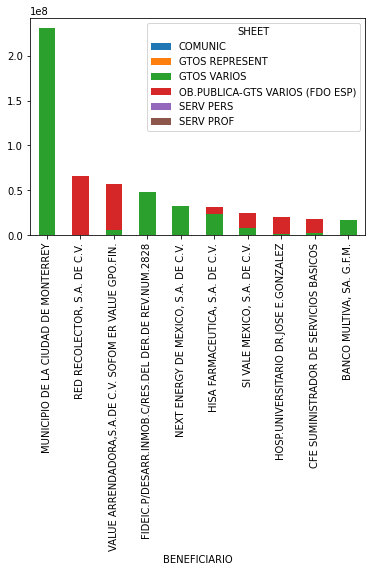

In [31]:
buys_sheet.loc[top_ben].plot.bar(stacked=True)

In [35]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stopwords.words('spanish')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [36]:
text_buys = ''
for row in data['CONCEPTO']:
  text_buys = text_buys + ' ' + row

In [37]:
stopwords_list = stopwords.words('spanish') + ['2021', 'cont', 'mty', 'dpp', 'op', 'millar', 'icom', 'est', 'ret']

In [40]:
text_buys = ' '.join([x for x in text_buys.strip().lower().split(' ') if x not in stopwords_list and len(x)>4])

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

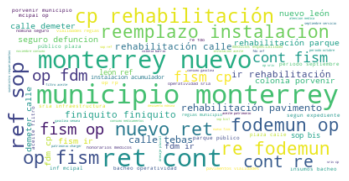

In [41]:
wc = WordCloud(background_color='white')
wc.generate(text_buys)

plt.axis('off')
plt.imshow(wc, interpolation='bilinear')
plt.show()